In [1]:
# pip install missingno

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Loading Data

In [4]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
server = 'LAPTOP-P44HR8JT'
database = 'TaxiData'
engine =  create_engine('mssql+pyodbc://{}/{}?driver=SQL Server'.format(server,database))

In [54]:
# for driver data
connection = engine.connect()
cursor = connection.execute('SELECT * FROM driver_data')
dfdriver = pd.DataFrame(data = cursor.fetchall(),columns=cursor.keys())
connection.close()

In [55]:
# for safety data
connection = engine.connect()
cursor = connection.execute('SELECT * FROM safety_labels')
dfsafety = pd.DataFrame(data = cursor.fetchall(),columns=cursor.keys())
connection.close()

In [56]:
# for sensor data 
connection = engine.connect()
cursor = connection.execute('SELECT * FROM sensor_data')
dfsensor = pd.DataFrame(data = cursor.fetchall(),columns=cursor.keys())
connection.close()

In [57]:
dfdriver.head()

,id,name,date_of_birth,gender,car_model,car_make_year,rating
0,1,Tressa,1992-01-12,Female,Mazda,2011,4.5
1,2,Virgilio,1992-10-23,Male,Mazda,2004,3.5
2,3,Bert,1989-08-10,Male,Nissan,2008,4.5
3,4,Mahmoud,1981-08-14,Male,Toyota,2008,4.5
4,5,Felecia,1990-07-20,Female,Hyundai,2010,4.5


In [58]:
dfsafety.head()

,bookingID,driver_id,label
0,0,48,0
1,1,74,1
2,2,40,1
3,4,112,1
4,6,68,0


In [59]:
dfsafety.head(25)

,bookingID,driver_id,label
0,0,48,0
1,1,74,1
2,2,40,1
3,4,112,1
4,6,68,0
5,7,81,0
6,8,107,0
7,10,75,0
8,11,10,0
9,13,126,0


In [60]:
dfsensor.head()

,bookingID,accuracy,bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871542,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


# Data Cleaning

In [14]:
dfdriver.isna().sum()

id               0
name             0
date_of_birth    0
gender           0
car_model        0
car_make_year    0
rating           0
dtype: int64

In [15]:
dfsafety.isna().sum()

bookingID    0
driver_id    0
label        0
dtype: int64

In [16]:
dfsensor.isna().sum()

bookingID              0
accuracy          118025
bearing           119403
acceleration_x    105117
acceleration_y    123103
acceleration_z     99136
gyro_x            133258
gyro_y            139712
gyro_z             65488
second                 0
speed             123577
dtype: int64

In [61]:
# Columns having missing values
missing_columns = [col for col in dfsensor.columns if dfsensor[col].isnull().sum() > 0]
missing_columns

['accuracy',
 'bearing',
 'acceleration_x',
 'acceleration_y',
 'acceleration_z',
 'gyro_x',
 'gyro_y',
 'gyro_z',
 'speed']

<AxesSubplot:>

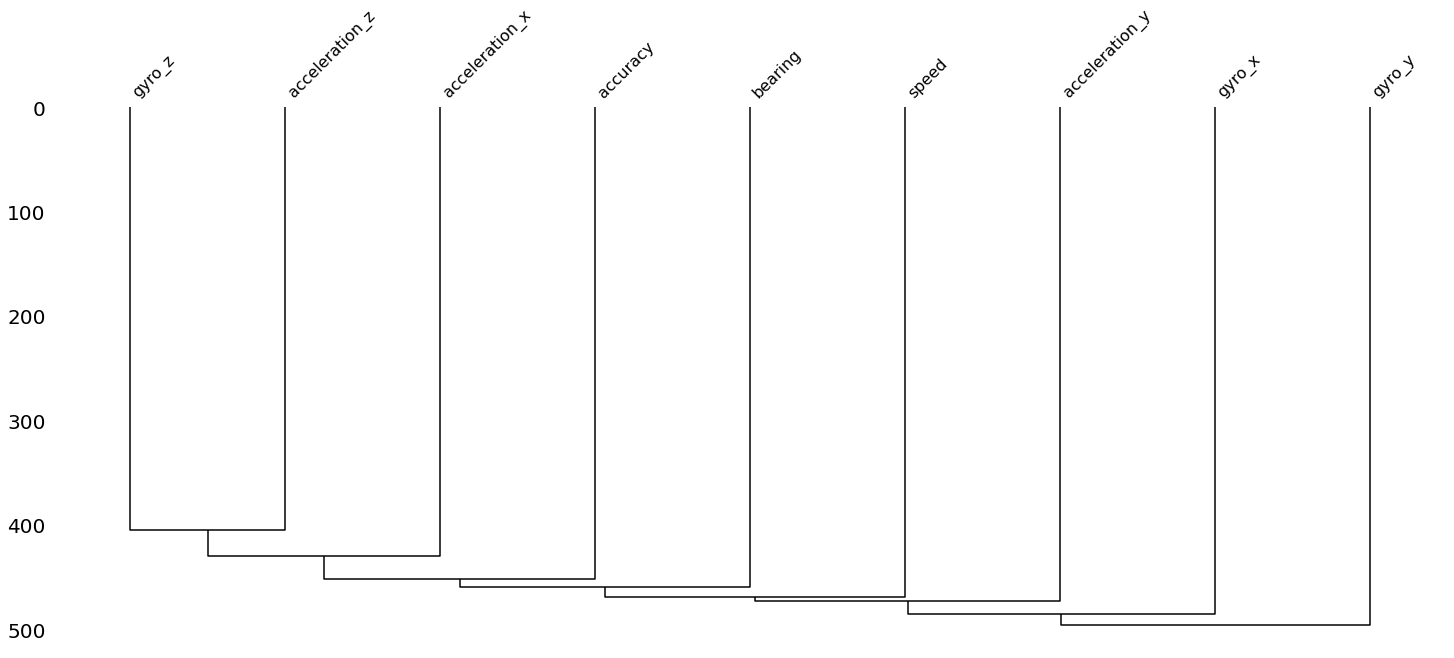

In [62]:
msno.dendrogram(dfsensor[missing_columns])

In [63]:
# Filling in  null values with mean for dfsensor
dfsensor['accuracy'].fillna(int(dfsensor['accuracy'].mean()), inplace=True)
dfsensor['bearing'].fillna(int(dfsensor['bearing'].mean()), inplace=True)
dfsensor['acceleration_x'].fillna(int(dfsensor['acceleration_x'].mean()), inplace=True)
dfsensor['acceleration_y'].fillna(int(dfsensor['acceleration_y'].mean()), inplace=True)
dfsensor['acceleration_z'].fillna(int(dfsensor['acceleration_z'].mean()), inplace=True)
dfsensor['gyro_x'].fillna(int(dfsensor['gyro_x'].mean()), inplace=True)
dfsensor['gyro_y'].fillna(int(dfsensor['gyro_y'].mean()), inplace=True)
dfsensor['gyro_z'].fillna(int(dfsensor['gyro_z'].mean()), inplace=True)
dfsensor['second'].fillna(int(dfsensor['second'].mean()), inplace=True)
dfsensor['speed'].fillna(int(dfsensor['speed'].mean()), inplace=True)

In [20]:
dfsensor.isna().sum()

bookingID         0
accuracy          0
bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
speed             0
dtype: int64

In [21]:
dfsensor

,bookingID,accuracy,bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,speed
0,1202590843006,3.000,353.000000,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.000000,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.000000,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.000000,3.871542,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.000000,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409
...,...,...,...,...,...,...,...,...,...,...,...
7469651,884763262985,3.900,226.000000,0.260422,9.907822,3.162796,0.013733,0.010056,0.017792,98.0,9.980000
7469652,1571958030347,5.000,341.782990,-1.168625,-9.396103,-0.009271,0.032545,0.009954,0.038534,509.0,6.440000
7469653,584115552361,6.000,50.000000,6.186806,6.809318,0.234639,0.505468,0.255951,0.202501,519.0,9.000000
7469654,1073741824126,10.720,324.000000,-0.274582,8.512177,3.903046,-0.037451,-0.044601,-0.033173,2289.0,8.770000


# Feature Engineering

In [64]:
dfsensor.drop(columns=['accuracy'],inplace=True)

In [65]:
dfsensor.drop(columns=['bearing'],inplace=True)

In [66]:
dfsensor

,bookingID,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,speed
0,1202590843006,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.871542,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409
...,...,...,...,...,...,...,...,...,...
7469651,884763262985,0.260422,9.907822,3.162796,0.013733,0.010056,0.017792,98.0,9.980000
7469652,1571958030347,-1.168625,-9.396103,-0.009271,0.032545,0.009954,0.038534,509.0,6.440000
7469653,584115552361,6.186806,6.809318,0.234639,0.505468,0.255951,0.202501,519.0,9.000000
7469654,1073741824126,-0.274582,8.512177,3.903046,-0.037451,-0.044601,-0.033173,2289.0,8.770000


In [67]:
second = dfsensor.groupby('bookingID').agg({'second': [np.max , np.min]})

In [26]:
second

second      
                 amax  amin
bookingID                  
0              1589.0   2.0
1              1034.0   0.0
2               822.0  10.0
4              1092.0   1.0
6              1092.0   1.0
...               ...   ...
1709396983957  1149.0   0.0
1709396983960   809.0   2.0
1709396983966   988.0   1.0
1709396983971  1076.0   1.0
1709396983975   556.0   0.0

[20000 rows x 2 columns]

In [68]:
second= second.reset_index(drop=True)

In [69]:
second['second']['amax']

0        1589.0
1        1034.0
2         822.0
3        1092.0
4        1092.0
          ...  
19995    1149.0
19996     809.0
19997     988.0
19998    1076.0
19999     556.0
Name: amax, Length: 20000, dtype: float64

In [70]:
second['second']['amin']

0         2.0
1         0.0
2        10.0
3         1.0
4         1.0
         ... 
19995     0.0
19996     2.0
19997     1.0
19998     1.0
19999     0.0
Name: amin, Length: 20000, dtype: float64

In [71]:
second['diff'] = (second['second']['amax']) - (second['second']['amin'])

In [72]:
second['diff']

0        1587.0
1        1034.0
2         812.0
3        1091.0
4        1091.0
          ...  
19995    1149.0
19996     807.0
19997     987.0
19998    1075.0
19999     556.0
Name: diff, Length: 20000, dtype: float64

In [73]:
bookings = dfsensor['bookingID'].unique()
acc_x = dfsensor.groupby('bookingID')['acceleration_x'].mean()
acc_y = dfsensor.groupby('bookingID')['acceleration_y'].mean()
acc_z = dfsensor.groupby('bookingID')['acceleration_z'].mean()
gyro_x = dfsensor.groupby('bookingID')['gyro_x'].mean()
gyro_y = dfsensor.groupby('bookingID')['gyro_y'].mean()
gyro_z = dfsensor.groupby('bookingID')['gyro_z'].mean()
speed = dfsensor.groupby('bookingID')['speed'].mean()
# second = dfsensor.groupby('bookingID').agg({'second': [np.max - np.min]})


c = {'bookingID': bookings , 'acceleration_x': acc_x, 'acceleration_y': acc_y, 'acceleration_z': acc_z, 'gyro_x': gyro_x, 'gyro_y': gyro_y,
     'gyro_z': gyro_z,'speed': speed}

sensor = pd.DataFrame(data = c)
sensor = sensor.reset_index(drop=True)
sensor

,bookingID,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed
0,1202590843006,-0.696622,-9.393250,-1.504964,0.004398,-0.001064,-0.001660,9.050004
1,274877907034,-0.502380,9.453449,-2.176012,-0.000864,-0.004367,0.002048,7.560713
2,884763263056,0.268015,9.628917,0.051261,-0.005605,-0.008987,0.004165,2.821090
3,1073741824054,-0.369952,-9.270183,-2.619765,-0.023491,0.023899,0.002986,6.134677
4,1056561954943,0.544215,9.431291,2.287620,0.006535,-0.010509,0.001599,4.708312
...,...,...,...,...,...,...,...,...
19995,395136991333,0.092056,1.957625,9.684256,0.032995,-0.017139,-0.008640,2.523996
19996,257698037859,0.551170,-8.334646,-4.408380,-0.011601,0.005544,-0.004294,7.615191
19997,541165879301,-0.203312,8.991769,3.311898,0.001180,-0.005944,-0.000670,12.607025
19998,317827579962,0.732015,8.845564,3.745995,0.002666,0.000257,-0.000931,6.072056


In [74]:
sensor['duration'] = second['diff']

In [34]:
sensor

,bookingID,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration
0,1202590843006,-0.696622,-9.393250,-1.504964,0.004398,-0.001064,-0.001660,9.050004,1587.0
1,274877907034,-0.502380,9.453449,-2.176012,-0.000864,-0.004367,0.002048,7.560713,1034.0
2,884763263056,0.268015,9.628917,0.051261,-0.005605,-0.008987,0.004165,2.821090,812.0
3,1073741824054,-0.369952,-9.270183,-2.619765,-0.023491,0.023899,0.002986,6.134677,1091.0
4,1056561954943,0.544215,9.431291,2.287620,0.006535,-0.010509,0.001599,4.708312,1091.0
...,...,...,...,...,...,...,...,...,...
19995,395136991333,0.092056,1.957625,9.684256,0.032995,-0.017139,-0.008640,2.523996,1149.0
19996,257698037859,0.551170,-8.334646,-4.408380,-0.011601,0.005544,-0.004294,7.615191,807.0
19997,541165879301,-0.203312,8.991769,3.311898,0.001180,-0.005944,-0.000670,12.607025,987.0
19998,317827579962,0.732015,8.845564,3.745995,0.002666,0.000257,-0.000931,6.072056,1075.0


In [75]:
sensor.drop(columns=['bookingID'],inplace=True)

In [76]:
sensor

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration
0,-0.696622,-9.393250,-1.504964,0.004398,-0.001064,-0.001660,9.050004,1587.0
1,-0.502380,9.453449,-2.176012,-0.000864,-0.004367,0.002048,7.560713,1034.0
2,0.268015,9.628917,0.051261,-0.005605,-0.008987,0.004165,2.821090,812.0
3,-0.369952,-9.270183,-2.619765,-0.023491,0.023899,0.002986,6.134677,1091.0
4,0.544215,9.431291,2.287620,0.006535,-0.010509,0.001599,4.708312,1091.0
...,...,...,...,...,...,...,...,...
19995,0.092056,1.957625,9.684256,0.032995,-0.017139,-0.008640,2.523996,1149.0
19996,0.551170,-8.334646,-4.408380,-0.011601,0.005544,-0.004294,7.615191,807.0
19997,-0.203312,8.991769,3.311898,0.001180,-0.005944,-0.000670,12.607025,987.0
19998,0.732015,8.845564,3.745995,0.002666,0.000257,-0.000931,6.072056,1075.0


In [77]:
import math
import numpy as np

In [78]:
# Calculate pitch
sensor['pitch'] = 180 * np.arctan(sensor['acceleration_x']/np.sqrt((sensor['acceleration_y']**2) + (sensor['acceleration_z']**2)))/math.pi

In [79]:
sensor['roll'] = 180 * np.arctan(sensor['acceleration_y']/np.sqrt((sensor['acceleration_x']**2) + (sensor['acceleration_z']**2)))/math.pi

In [80]:
#calculate yaw
sensor['yaw'] = 180 * np.arctan(sensor['acceleration_z']/np.sqrt((sensor['acceleration_x']**2) + (sensor['acceleration_z']**2)))/math.pi

In [81]:
sensor[['pitch', 'roll', 'yaw']].head()

,pitch,roll,yaw
0,-4.188185,-79.987643,-42.223571
1,-2.964600,76.708316,-44.256243
2,1.594356,88.376737,10.639320
3,-2.199288,-74.070982,-44.717169
4,3.209620,76.000127,44.211554


In [43]:
# EXPLANATION

The roll angle, also known as the bank angle, is the angle between the longitudinal axis of an aircraft and the horizontal plane. It is typically measured in degrees and can be positive (nose up) or negative (nose down). The formula for calculating roll angle is based on the data from the accelerometer sensor. The formula is as follows:

Roll = atan2(Ay, Az)

where Ay is the acceleration along the y-axis and Az is the acceleration along the z-axis.

Note that the atan2 function is used instead of the arctangent function (atan) because atan2 can handle the full range of input values, whereas atan can only handle values between -90 and 90 degrees.

Keep in mind that the accuracy of the roll angle calculation will depend on the quality of the sensor data, and the specific method used to calculate the angle. Also, the result will be in radians, you need to convert it to degrees if necessary.


The pitch angle is a measure of rotation around the x-axis and is typically measured in degrees. It can be positive (nose up) or negative (nose down). The formula for calculating pitch angle depends on the type of sensor data you have available. Here are a few common methods:

Using Accelerometer data: The formula for calculating pitch using accelerometer data is as follows:
pitch = atan2(Ax, sqrt(Ay^2 + Az^2))

Where Ax is the acceleration along the x-axis, Ay is the acceleration along the y-axis and Az is the acceleration along the z-axis. Note that the atan2 function is used instead of the arctangent function (atan) because atan2 can handle the full range of input values, whereas atan can only handle values between -90 and 90 degrees.

Using Gyroscopic data: The formula for calculating pitch using gyroscopic data is as follows:
pitch = pitch_prev + angular_velocity_x * dt

Where pitch_prev is the previous pitch angle, angular_velocity_x is the angular velocity around the x-axis and dt is the time elapsed since the last measurement.

It's important to note that these formulas are just examples and the accuracy of the calculated pitch angle will depend on the quality of sensor data and the specific method used to calculate the angle. Also, the result may be in radians, you need to convert it to degrees if necessary.


The yaw angle is a measure of rotation around the z-axis and is typically measured in degrees. It can be positive (turning right) or negative (turning left). The formula for calculating yaw angle depends on the type of sensor data you have available. Here are a few common methods:

Using Magnetometer data: The formula for calculating yaw using magnetometer data is as follows:
yaw = atan2(My, Mx)

Where Mx is the magnetic field strength along the x-axis and My is the magnetic field strength along the y-axis.

Using Gyroscopic data: The formula for calculating yaw using gyroscopic data is as follows:
yaw = yaw_prev + angular_velocity_z * dt

Where yaw_prev is the previous yaw angle, angular_velocity_z is the angular velocity around the z-axis and dt is the time elapsed since the last measurement.

using quaternions: yaw can be computed using the quaternion representation, where it is represented as the angle between the quaternion and the vector (0,0,1) in the z-axis. The formula for that is as follows:
yaw = atan2(2*(q0q3+q1q2),1-2*(q2q2+q3q3))

It's important to note that these formulas are just examples and the accuracy of the calculated yaw angle will depend on the quality of sensor data and the specific method used to calculate the angle. Also, the result may be in radians, you need to convert it to degrees if necessary.


In [44]:
sensor

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration,pitch,roll,yaw
0,-0.696622,-9.393250,-1.504964,0.004398,-0.001064,-0.001660,9.050004,1587.0,-4.188185,-79.987643,-42.223571
1,-0.502380,9.453449,-2.176012,-0.000864,-0.004367,0.002048,7.560713,1034.0,-2.964600,76.708316,-44.256243
2,0.268015,9.628917,0.051261,-0.005605,-0.008987,0.004165,2.821090,812.0,1.594356,88.376737,10.639320
3,-0.369952,-9.270183,-2.619765,-0.023491,0.023899,0.002986,6.134677,1091.0,-2.199288,-74.070982,-44.717169
4,0.544215,9.431291,2.287620,0.006535,-0.010509,0.001599,4.708312,1091.0,3.209620,76.000127,44.211554
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.092056,1.957625,9.684256,0.032995,-0.017139,-0.008640,2.523996,1149.0,0.533827,11.427562,44.998706
19996,0.551170,-8.334646,-4.408380,-0.011601,0.005544,-0.004294,7.615191,807.0,3.345514,-61.940590,-44.777823
19997,-0.203312,8.991769,3.311898,0.001180,-0.005944,-0.000670,12.607025,987.0,-1.215486,69.744984,44.946121
19998,0.732015,8.845564,3.745995,0.002666,0.000257,-0.000931,6.072056,1075.0,4.357713,66.659876,44.463240


In [82]:
df2 = pd.concat(
    [
        dfsafety.reset_index(drop=True),
        sensor.reset_index(drop=True)
    ],
    axis=1,
    ignore_index=True,
)

df2_columns = [
    list(dfsafety.columns),
    list(sensor.columns)
]

    
    
flatten = lambda nested_lists: [item for sublist in nested_lists for item in sublist]

df2.columns = flatten(df2_columns)

df2.drop(columns=['driver_id'],inplace=True)


In [83]:
df2

,bookingID,label,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration,pitch,roll,yaw
0,0,0,-0.696622,-9.393250,-1.504964,0.004398,-0.001064,-0.001660,9.050004,1587.0,-4.188185,-79.987643,-42.223571
1,1,1,-0.502380,9.453449,-2.176012,-0.000864,-0.004367,0.002048,7.560713,1034.0,-2.964600,76.708316,-44.256243
2,2,1,0.268015,9.628917,0.051261,-0.005605,-0.008987,0.004165,2.821090,812.0,1.594356,88.376737,10.639320
3,4,1,-0.369952,-9.270183,-2.619765,-0.023491,0.023899,0.002986,6.134677,1091.0,-2.199288,-74.070982,-44.717169
4,6,0,0.544215,9.431291,2.287620,0.006535,-0.010509,0.001599,4.708312,1091.0,3.209620,76.000127,44.211554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1709396983957,1,0.092056,1.957625,9.684256,0.032995,-0.017139,-0.008640,2.523996,1149.0,0.533827,11.427562,44.998706
19996,1709396983960,1,0.551170,-8.334646,-4.408380,-0.011601,0.005544,-0.004294,7.615191,807.0,3.345514,-61.940590,-44.777823
19997,1709396983966,1,-0.203312,8.991769,3.311898,0.001180,-0.005944,-0.000670,12.607025,987.0,-1.215486,69.744984,44.946121
19998,1709396983971,1,0.732015,8.845564,3.745995,0.002666,0.000257,-0.000931,6.072056,1075.0,4.357713,66.659876,44.463240


In [84]:
df3 = df2
df3

,bookingID,label,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration,pitch,roll,yaw
0,0,0,-0.696622,-9.393250,-1.504964,0.004398,-0.001064,-0.001660,9.050004,1587.0,-4.188185,-79.987643,-42.223571
1,1,1,-0.502380,9.453449,-2.176012,-0.000864,-0.004367,0.002048,7.560713,1034.0,-2.964600,76.708316,-44.256243
2,2,1,0.268015,9.628917,0.051261,-0.005605,-0.008987,0.004165,2.821090,812.0,1.594356,88.376737,10.639320
3,4,1,-0.369952,-9.270183,-2.619765,-0.023491,0.023899,0.002986,6.134677,1091.0,-2.199288,-74.070982,-44.717169
4,6,0,0.544215,9.431291,2.287620,0.006535,-0.010509,0.001599,4.708312,1091.0,3.209620,76.000127,44.211554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1709396983957,1,0.092056,1.957625,9.684256,0.032995,-0.017139,-0.008640,2.523996,1149.0,0.533827,11.427562,44.998706
19996,1709396983960,1,0.551170,-8.334646,-4.408380,-0.011601,0.005544,-0.004294,7.615191,807.0,3.345514,-61.940590,-44.777823
19997,1709396983966,1,-0.203312,8.991769,3.311898,0.001180,-0.005944,-0.000670,12.607025,987.0,-1.215486,69.744984,44.946121
19998,1709396983971,1,0.732015,8.845564,3.745995,0.002666,0.000257,-0.000931,6.072056,1075.0,4.357713,66.659876,44.463240


In [85]:
df3.drop(columns=['bookingID'],inplace=True)
df3

,label,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration,pitch,roll,yaw
0,0,-0.696622,-9.393250,-1.504964,0.004398,-0.001064,-0.001660,9.050004,1587.0,-4.188185,-79.987643,-42.223571
1,1,-0.502380,9.453449,-2.176012,-0.000864,-0.004367,0.002048,7.560713,1034.0,-2.964600,76.708316,-44.256243
2,1,0.268015,9.628917,0.051261,-0.005605,-0.008987,0.004165,2.821090,812.0,1.594356,88.376737,10.639320
3,1,-0.369952,-9.270183,-2.619765,-0.023491,0.023899,0.002986,6.134677,1091.0,-2.199288,-74.070982,-44.717169
4,0,0.544215,9.431291,2.287620,0.006535,-0.010509,0.001599,4.708312,1091.0,3.209620,76.000127,44.211554
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,0.092056,1.957625,9.684256,0.032995,-0.017139,-0.008640,2.523996,1149.0,0.533827,11.427562,44.998706
19996,1,0.551170,-8.334646,-4.408380,-0.011601,0.005544,-0.004294,7.615191,807.0,3.345514,-61.940590,-44.777823
19997,1,-0.203312,8.991769,3.311898,0.001180,-0.005944,-0.000670,12.607025,987.0,-1.215486,69.744984,44.946121
19998,1,0.732015,8.845564,3.745995,0.002666,0.000257,-0.000931,6.072056,1075.0,4.357713,66.659876,44.463240


In [49]:
# DFDRIVER

In [86]:
dfdriver.drop(columns=['name'],inplace=True)

In [87]:
from datetime import datetime, date

dfdriver['date_of_birth'] = pd.to_datetime(dfdriver.date_of_birth, format='%Y-%m-%d')
dfdriver['date_of_birth'] = dfdriver['date_of_birth'].dt.strftime('%d/%m/%Y')

# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month,today.day) < (born.month,born.day))

dfdriver['Age'] = dfdriver['date_of_birth'].apply(age)

In [88]:
dfdriver.drop(columns=['date_of_birth'],inplace=True)

In [89]:
dfdriver

,id,gender,car_model,car_make_year,rating,Age
0,1,Female,Mazda,2011,4.5,31
1,2,Male,Mazda,2004,3.5,30
2,3,Male,Nissan,2008,4.5,33
3,4,Male,Toyota,2008,4.5,41
4,5,Female,Hyundai,2010,4.5,32
...,...,...,...,...,...,...
143,144,Female,Chevrolet,2011,4.0,40
144,145,Female,Mazda,2011,5.0,30
145,146,Male,Volkswagen,2010,5.0,38
146,147,Female,Toyota,2011,3.0,40


# Anomaly Detection

In [90]:
df = df3

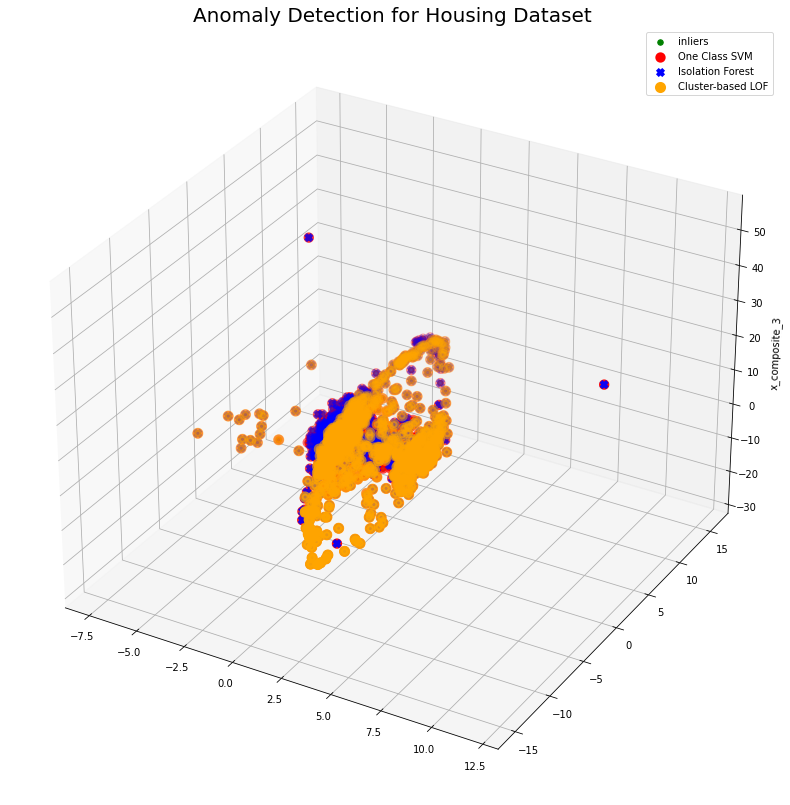

In [91]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')


# load the dataset
df = df3
df = df.drop('label',axis = 1)


# Outlier Detection
classifier_dict = {"One-Class SVM": OneClassSVM(nu=0.05),
                   "Isolation Forest": IsolationForest(contamination=0.05),
                   "Cluster-based LOF": LocalOutlierFactor(contamination=0.05)}
Outliers = pd.DataFrame()
for i, (clf_name, clf) in enumerate(classifier_dict.items()):
    clf.fit(df)
    df["anomaly"] = clf.fit_predict(df)
    outliers_subset = df[df.anomaly == -1]
    outliers_subset = outliers_subset.assign(model = clf_name)
    Outliers = pd.concat([Outliers, outliers_subset], axis=0, ignore_index=False)

pca = PCA(n_components=3) # reduce to k=3 dimensions
scaler = StandardScaler()
X = scaler.fit_transform(df)
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(111, projection="3d")
ax.set_zlabel("x_composite_3")
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=30, lw=1, label="inliers",c="green")
ax.scatter(X_reduce[Outliers[Outliers['model']=='One-Class SVM'].index, 0],
           X_reduce[Outliers[Outliers['model']=='One-Class SVM'].index, 1],
           X_reduce[Outliers[Outliers['model']=='One-Class SVM'].index, 2],
           lw=4, s=40, c="red", label="One Class SVM")
ax.scatter(X_reduce[Outliers[Outliers['model']=='Isolation Forest'].index, 0],
           X_reduce[Outliers[Outliers['model']=='Isolation Forest'].index, 1],
           X_reduce[Outliers[Outliers['model']=='Isolation Forest'].index, 2],
           lw=4, s=40, marker='x', c="blue", label="Isolation Forest")
ax.scatter(X_reduce[Outliers[Outliers['model']=='Cluster-based LOF'].index, 0],
           X_reduce[Outliers[Outliers['model']=='Cluster-based LOF'].index, 1],
           X_reduce[Outliers[Outliers['model']=='Cluster-based LOF'].index, 2],
           lw=4, s=50, c="orange", label="Cluster-based LOF")
plt.title("Anomaly Detection for Housing Dataset", fontsize=20)
plt.legend()
plt.tight_layout()


In [92]:
df[df.anomaly == 1]

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration,pitch,roll,yaw,anomaly
0,-0.696622,-9.393250,-1.504964,0.004398,-0.001064,-0.001660,9.050004,1587.0,-4.188185,-79.987643,-42.223571,1
1,-0.502380,9.453449,-2.176012,-0.000864,-0.004367,0.002048,7.560713,1034.0,-2.964600,76.708316,-44.256243,1
2,0.268015,9.628917,0.051261,-0.005605,-0.008987,0.004165,2.821090,812.0,1.594356,88.376737,10.639320,1
3,-0.369952,-9.270183,-2.619765,-0.023491,0.023899,0.002986,6.134677,1091.0,-2.199288,-74.070982,-44.717169,1
4,0.544215,9.431291,2.287620,0.006535,-0.010509,0.001599,4.708312,1091.0,3.209620,76.000127,44.211554,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.092056,1.957625,9.684256,0.032995,-0.017139,-0.008640,2.523996,1149.0,0.533827,11.427562,44.998706,1
19996,0.551170,-8.334646,-4.408380,-0.011601,0.005544,-0.004294,7.615191,807.0,3.345514,-61.940590,-44.777823,1
19997,-0.203312,8.991769,3.311898,0.001180,-0.005944,-0.000670,12.607025,987.0,-1.215486,69.744984,44.946121,1
19998,0.732015,8.845564,3.745995,0.002666,0.000257,-0.000931,6.072056,1075.0,4.357713,66.659876,44.463240,1


In [93]:
df[df.anomaly == -1]

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration,pitch,roll,yaw,anomaly
12,2.874215,9.244603,-1.499408,-0.004713,0.002878,-0.000664,12.985631,614.0,17.061084,70.675733,-24.821567,-1
36,0.458374,9.198981,2.810555,0.002544,-0.010835,0.016220,22.314738,342.0,2.728321,72.799274,44.623995,-1
55,3.263466,8.230380,3.900641,0.003720,-0.001796,-0.003265,8.803191,597.0,19.713158,58.286904,37.487096,-1
106,-0.093932,-2.565357,-8.933090,-0.013227,0.000322,-0.025290,2.449854,568.0,-0.579042,-16.021885,-44.998416,-1
117,-0.552770,5.361610,8.097045,-0.020196,-0.026396,0.000355,3.702558,460.0,-3.257785,33.449989,44.933398,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
19850,-1.058473,6.960500,0.823775,-0.053210,-0.020424,-0.044947,6.252616,601.0,-8.587607,79.093050,31.557475,-1
19879,-0.000214,-3.584982,-9.076234,-0.013482,0.003467,0.006116,16.076895,913.0,-0.001255,-21.553307,-45.000000,-1
19904,-2.328688,8.993817,2.699669,0.000037,0.003423,0.014002,8.445972,1533.0,-13.927788,68.376075,37.133646,-1
19924,-5.918456,-0.495166,1.129057,0.053150,-0.004094,-0.016233,3.559655,1673.0,-78.233061,-4.698161,10.613539,-1


In [94]:
outliers_subset

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration,pitch,roll,yaw,anomaly,model
12,2.874215,9.244603,-1.499408,-0.004713,0.002878,-0.000664,12.985631,614.0,17.061084,70.675733,-24.821567,-1,Cluster-based LOF
36,0.458374,9.198981,2.810555,0.002544,-0.010835,0.016220,22.314738,342.0,2.728321,72.799274,44.623995,-1,Cluster-based LOF
55,3.263466,8.230380,3.900641,0.003720,-0.001796,-0.003265,8.803191,597.0,19.713158,58.286904,37.487096,-1,Cluster-based LOF
106,-0.093932,-2.565357,-8.933090,-0.013227,0.000322,-0.025290,2.449854,568.0,-0.579042,-16.021885,-44.998416,-1,Cluster-based LOF
117,-0.552770,5.361610,8.097045,-0.020196,-0.026396,0.000355,3.702558,460.0,-3.257785,33.449989,44.933398,-1,Cluster-based LOF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19850,-1.058473,6.960500,0.823775,-0.053210,-0.020424,-0.044947,6.252616,601.0,-8.587607,79.093050,31.557475,-1,Cluster-based LOF
19879,-0.000214,-3.584982,-9.076234,-0.013482,0.003467,0.006116,16.076895,913.0,-0.001255,-21.553307,-45.000000,-1,Cluster-based LOF
19904,-2.328688,8.993817,2.699669,0.000037,0.003423,0.014002,8.445972,1533.0,-13.927788,68.376075,37.133646,-1,Cluster-based LOF
19924,-5.918456,-0.495166,1.129057,0.053150,-0.004094,-0.016233,3.559655,1673.0,-78.233061,-4.698161,10.613539,-1,Cluster-based LOF


# Imbalanced Data

In [95]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

We will be using different methods to counter the imbalance of data and we will be fitting a DecisionTreeClassifier model and RandomForestClassifier model for each of the methods to see if the performance varies significantly.


In [96]:
df = df3

In [97]:
y = df3['label']
X = df.drop('label',axis = 1)

In [ ]:
# scale train and test data, on duration column
scaler = StandardScaler()
X['duration'] = scaler.fit_transform(X_train['duration'].values.reshape(-1, 1))

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   acceleration_x  20000 non-null  float64
 1   acceleration_y  20000 non-null  float64
 2   acceleration_z  20000 non-null  float64
 3   gyro_x          20000 non-null  float64
 4   gyro_y          20000 non-null  float64
 5   gyro_z          20000 non-null  float64
 6   speed           20000 non-null  float64
 7   duration        20000 non-null  float64
 8   pitch           20000 non-null  float64
 9   roll            20000 non-null  float64
 10  yaw             20000 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


## Random Under sampling with random forest classifier

                precision    recall  f1-score   support

   Normal trip       0.61      0.68      0.64      1257
Dangerous trip       0.63      0.57      0.60      1240

      accuracy                           0.62      2497
     macro avg       0.62      0.62      0.62      2497
  weighted avg       0.62      0.62      0.62      2497



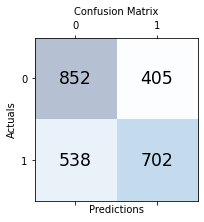

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.75, random_state=102)
# define model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
# make prediction
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['Normal trip', 'Dangerous trip']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Random Under sampling with decision tree classifier

                precision    recall  f1-score   support

   Normal trip       0.57      0.56      0.57      1257
Dangerous trip       0.56      0.57      0.56      1240

      accuracy                           0.56      2497
     macro avg       0.56      0.56      0.56      2497
  weighted avg       0.56      0.56      0.56      2497



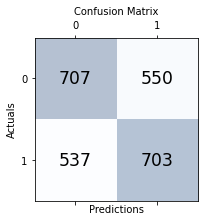

In [47]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.75, random_state=102)
# define model
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train, y_train)
# make prediction
y_pred = dc_model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['Normal trip', 'Dangerous trip']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Synthetic Minority Over-sampling Technique with decision tree classifier 

                precision    recall  f1-score   support

   Normal trip       0.69      0.67      0.68      3734
Dangerous trip       0.68      0.71      0.69      3770

      accuracy                           0.69      7504
     macro avg       0.69      0.69      0.69      7504
  weighted avg       0.69      0.69      0.69      7504



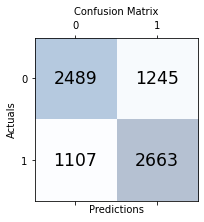

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.75, random_state=102)
# define model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# make prediction
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['Normal trip', 'Dangerous trip']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Synthetic Minority Over-sampling Technique with decision tree classifier and balanced class weight

                precision    recall  f1-score   support

   Normal trip       0.78      0.79      0.79      3735
Dangerous trip       0.37      0.35      0.36      1265

      accuracy                           0.68      5000
     macro avg       0.58      0.57      0.57      5000
  weighted avg       0.68      0.68      0.68      5000



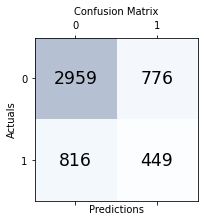

In [48]:
# adding class weight
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=102)
# define model
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)
# make prediction
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['Normal trip', 'Dangerous trip']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Synthetic Minority Over-sampling Technique with random forest classifier

                precision    recall  f1-score   support

   Normal trip       0.79      0.79      0.79      3734
Dangerous trip       0.79      0.79      0.79      3770

      accuracy                           0.79      7504
     macro avg       0.79      0.79      0.79      7504
  weighted avg       0.79      0.79      0.79      7504



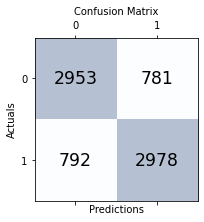

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.75, random_state=102)
# define model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# make prediction
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['Normal trip', 'Dangerous trip']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()


## Synthetic Minority Over-sampling Technique with random forest classifier and balanced class weight

                precision    recall  f1-score   support

   Normal trip       0.77      0.97      0.86      3735
Dangerous trip       0.63      0.16      0.25      1265

      accuracy                           0.76      5000
     macro avg       0.70      0.56      0.56      5000
  weighted avg       0.74      0.76      0.71      5000



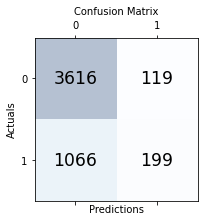

In [50]:
# adding class weight
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=102)
# define model
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
# make prediction
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['Normal trip', 'Dangerous trip']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## XGBoost

                precision    recall  f1-score   support

   Normal trip       0.78      0.94      0.85      3735
Dangerous trip       0.55      0.21      0.31      1265

      accuracy                           0.76      5000
     macro avg       0.67      0.58      0.58      5000
  weighted avg       0.72      0.76      0.71      5000



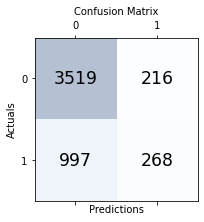

In [51]:
from xgboost import XGBClassifier

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=102)
# define model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# make prediction
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['Normal trip', 'Dangerous trip']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Random Over sampling with decision tree classifier

                precision    recall  f1-score   support

   Normal trip       0.91      0.75      0.82      3734
Dangerous trip       0.79      0.93      0.85      3770

      accuracy                           0.84      7504
     macro avg       0.85      0.84      0.84      7504
  weighted avg       0.85      0.84      0.84      7504



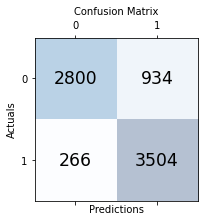

In [71]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size=0.75, random_state=102)
# define model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# make prediction
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['Normal trip', 'Dangerous trip']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Random Over sampling with random forest classifier

                precision    recall  f1-score   support

   Normal trip       0.92      0.89      0.91      3734
Dangerous trip       0.90      0.92      0.91      3770

      accuracy                           0.91      7504
     macro avg       0.91      0.91      0.91      7504
  weighted avg       0.91      0.91      0.91      7504



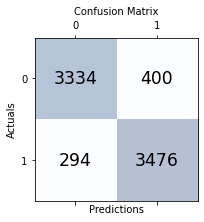

In [101]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size=0.75, random_state=102)
# define model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# make prediction
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['Normal trip', 'Dangerous trip']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

Random over sampling gives the best scores among all the other methods. Whether it is fitted with a DecisionTreeClaasifier or a RandomForestClassifier, using the random over sampling method to handle imabalance data gives the highest f1, precision and recall scores.Hence, we will be using random over sampling. 


In [102]:
# These are the resampled X and y
y = y_ros
X = X_ros

# Handling and removing outliers
We will be using different methods to remove the outliers and we will be fitting a DaecisionTreeClassifier model and RandomForestClassifier model for each of the methods and decide which will be the best method based on the scores from the classification report

## Baseline model - decision tree classifier

                precision    recall  f1-score   support

   Normal trip       0.89      0.72      0.80      4987
Dangerous trip       0.76      0.91      0.83      4918

      accuracy                           0.82      9905
     macro avg       0.83      0.82      0.82      9905
  weighted avg       0.83      0.82      0.82      9905



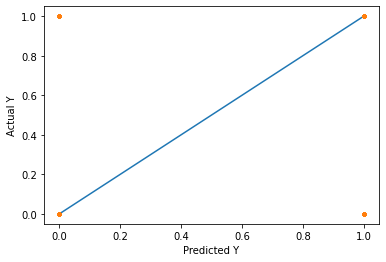

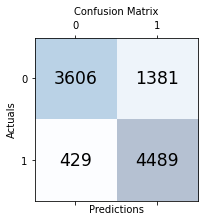

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
# model = LinearRegression()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
print(classification_report(y_test, yhat,target_names=['Normal trip', 'Dangerous trip']))
plt.plot(y_test, y_test)  # baseline
plt.plot(yhat, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Isolation forest and Decision Tree Classifier

Initial shape of the training dataset X_train: (20109, 11)  y_train: (20109,)

Shape of the training dataset after removing outliers X_train: (19107, 11)  y_train: (19107,)
                precision    recall  f1-score   support

   Normal trip       0.86      0.72      0.79      4987
Dangerous trip       0.76      0.88      0.82      4918

      accuracy                           0.80      9905
     macro avg       0.81      0.80      0.80      9905
  weighted avg       0.81      0.80      0.80      9905



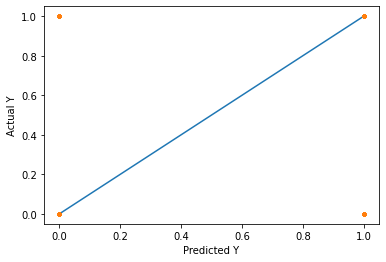

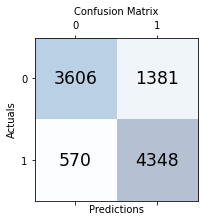

In [75]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset','X_train:', X_train.shape,' y_train:', y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.05)
x_out = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('\nShape of the training dataset after removing outliers', 'X_train:', X_train.shape,' y_train:', y_train.shape)
# fit the model
model = DecisionTreeClassifier(max_depth=29,max_features=0.6,min_samples_leaf=1,random_state=3)
model.fit(X_train, y_train)
# evaluate the model
yhat1 = model.predict(X_test)
# evaluate predictions
print(classification_report(y_test, yhat1,target_names=['Normal trip', 'Dangerous trip']))
plt.plot(y_test, y_test)  # baseline
plt.plot(yhat1, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat1)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Isolation forest and Random Forest Classifier 

Initial shape of the training dataset X_train: (20109, 11)  y_train: (20109,)

Shape of the training dataset after removing outliers X_train: (19103, 11)  y_train: (19103,)
                precision    recall  f1-score   support

   Normal trip       0.88      0.87      0.88      4987
Dangerous trip       0.87      0.88      0.88      4918

      accuracy                           0.88      9905
     macro avg       0.88      0.88      0.88      9905
  weighted avg       0.88      0.88      0.88      9905



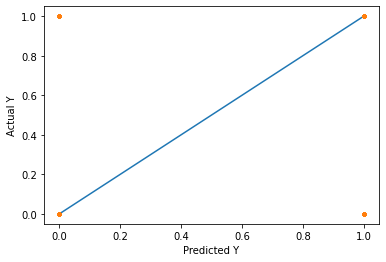

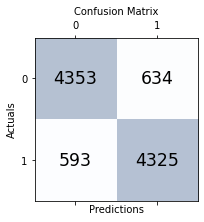

In [76]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset','X_train:', X_train.shape,' y_train:', y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.05)
x_out = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('\nShape of the training dataset after removing outliers', 'X_train:', X_train.shape,' y_train:', y_train.shape)
# fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat1 = model.predict(X_test)
# evaluate predictions
print(classification_report(y_test, yhat1,target_names=['Normal trip', 'Dangerous trip']))
plt.plot(y_test, y_test)  # baseline
plt.plot(yhat1, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat1)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Local Outlier Factor and Decision Tree Classifier

Initial shape of the training dataset (20109, 11) (20109,)
Shape of the training dataset after removing outliers (19103, 11) (19103,)
                precision    recall  f1-score   support

   Normal trip       0.86      0.73      0.79      4987
Dangerous trip       0.76      0.88      0.82      4918

      accuracy                           0.80      9905
     macro avg       0.81      0.80      0.80      9905
  weighted avg       0.81      0.80      0.80      9905



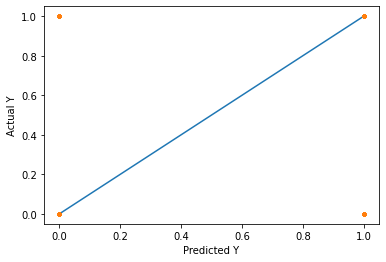

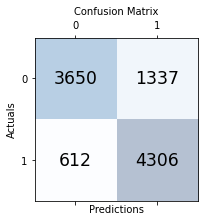

In [77]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset', X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor(contamination=0.05)
x_out = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('Shape of the training dataset after removing outliers', X_train.shape, y_train.shape)
# fit the model
model = DecisionTreeClassifier(max_depth=29,max_features=0.6,min_samples_leaf=1,random_state=3)
model.fit(X_train, y_train)
# evaluate the model
yhat2 = model.predict(X_test)
# evaluate predictions
print(classification_report(y_test, yhat2,target_names=['Normal trip', 'Dangerous trip']))
plt.plot(y_test, y_test)  # baseline
plt.plot(yhat2, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat2)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Local outlier factor and Random forest classifier 

Initial shape of the training dataset (20109, 11) (20109,)
Shape of the training dataset after removing outliers (19103, 11) (19103,)
                precision    recall  f1-score   support

   Normal trip       0.88      0.87      0.87      4987
Dangerous trip       0.87      0.88      0.87      4918

      accuracy                           0.87      9905
     macro avg       0.87      0.87      0.87      9905
  weighted avg       0.87      0.87      0.87      9905



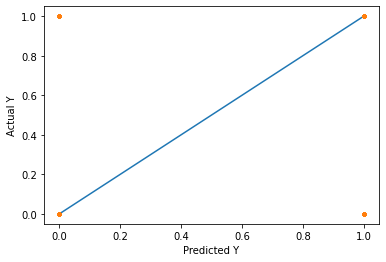

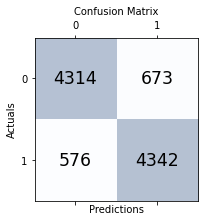

In [78]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset', X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor(contamination=0.05)
x_out = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('Shape of the training dataset after removing outliers', X_train.shape, y_train.shape)
# fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat2 = model.predict(X_test)
# evaluate predictions
print(classification_report(y_test, yhat2,target_names=['Normal trip', 'Dangerous trip']))
plt.plot(y_test, y_test)  # baseline
plt.plot(yhat2, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat2)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## One class SVM and Decision tree classifier

Initial shape of the training dataset (20109, 11) (20109,)
Shape of the training dataset after removing outliers (8159, 11) (8159,)
                precision    recall  f1-score   support

   Normal trip       0.66      0.73      0.69      4987
Dangerous trip       0.69      0.62      0.65      4918

      accuracy                           0.67      9905
     macro avg       0.67      0.67      0.67      9905
  weighted avg       0.67      0.67      0.67      9905



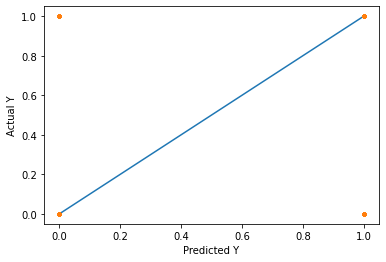

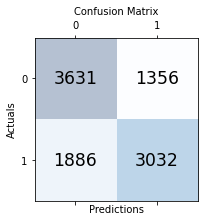

In [79]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset', X_train.shape, y_train.shape)
# identify outliers in the training dataset
svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto')
x_out = svm.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('Shape of the training dataset after removing outliers', X_train.shape, y_train.shape)
# fit the model
model = DecisionTreeClassifier(max_depth=29,max_features=0.6,min_samples_leaf=1,random_state=3)
model.fit(X_train, y_train)
# evaluate the model
yhat3 = model.predict(X_test)
# evaluate predictions
print(classification_report(y_test, yhat3,target_names=['Normal trip', 'Dangerous trip']))
plt.plot(y_test, y_test)  # baseline
plt.plot(yhat3, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat3)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

##  One class SVM and Random forest classifier

Initial shape of the training dataset (20109, 11) (20109,)
Shape of the training dataset after removing outliers (8159, 11) (8159,)
                precision    recall  f1-score   support

   Normal trip       0.67      0.87      0.76      4987
Dangerous trip       0.81      0.57      0.67      4918

      accuracy                           0.72      9905
     macro avg       0.74      0.72      0.71      9905
  weighted avg       0.74      0.72      0.71      9905



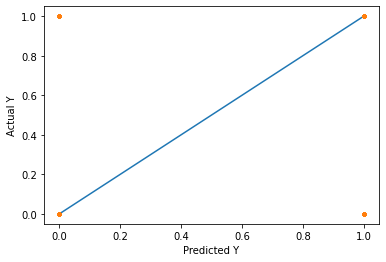

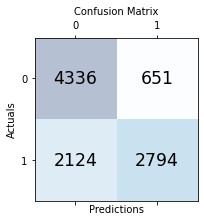

In [80]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset', X_train.shape, y_train.shape)
# identify outliers in the training dataset
svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto')
x_out = svm.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('Shape of the training dataset after removing outliers', X_train.shape, y_train.shape)
# fit the model
model =  RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat3 = model.predict(X_test)
# evaluate predictions
print(classification_report(y_test, yhat3,target_names=['Normal trip', 'Dangerous trip']))
plt.plot(y_test, y_test)  # baseline
plt.plot(yhat3, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat3)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

Overall, Random forest classifier with the isolation forest gives the highest precision,recall and f1 scores. It has a f1 score of 0.88. 

Initial shape of the training dataset X_train: (20109, 11)  y_train: (20109,)

Shape of the training dataset after removing outliers X_train: (19103, 11)  y_train: (19103,)
                precision    recall  f1-score   support

   Normal trip       0.88      0.87      0.88      4987
Dangerous trip       0.87      0.88      0.87      4918

      accuracy                           0.88      9905
     macro avg       0.88      0.88      0.88      9905
  weighted avg       0.88      0.88      0.88      9905



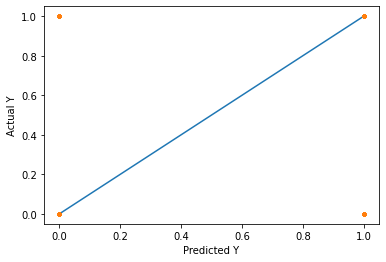

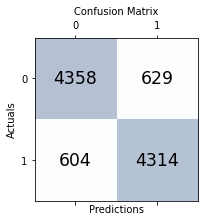

In [103]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset','X_train:', X_train.shape,' y_train:', y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.05)
x_out = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('\nShape of the training dataset after removing outliers', 'X_train:', X_train.shape,' y_train:', y_train.shape)
# fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# evaluate the model
yhat1 = model.predict(X_test)
# evaluate predictions
print(classification_report(y_test, yhat1,target_names=['Normal trip', 'Dangerous trip']))
plt.plot(y_test, y_test)  # baseline
plt.plot(yhat1, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat1)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

This shows that the predictions for both labels - dangerous and normal trips are predicted with high accuracy. Isolation forest 
removes outliers more accurately than the other methods and therefore, when fitted with random forest classifier, gives the highest scores.

In [104]:
# export X_train, X_test, y_train, y_test
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)